# El set de datos de Netflix

La información recolectada proviene del catálogo de Netflix y se encuentra en un archivo CSV (netflix_titles.csv) con 8,807 filas y 12 columnas.

Cada registro contiene 11 características y una categoría que indica el tipo de contenido ("Movie" o "TV Show"). Las columnas son:

"show_id": Identificador único del título (categórica).
"type": Tipo de contenido (categórica: "Movie", "TV Show").
"title": Nombre del título (categórica).
"director": Nombre del director (categórica, puede estar vacío).
"cast": Lista de actores principales (categórica, puede estar vacío).
"country": País de origen (categórica, puede estar vacío).
"date_added": Fecha en la que se agregó el título a Netflix (categórica).
"release_year": Año de lanzamiento (numérica).
"rating": Clasificación por edades (categórica: "G", "PG", "PG-13", "R", "TV-MA", etc.).
"duration": Duración del contenido en minutos o número de temporadas (categórica).
"listed_in": Género o categoría del contenido (categórica, puede tener múltiples valores separados por comas).
"description": Descripción breve del contenido (categórica).

# Primera mirada al dataset

In [3]:
# Importar librerías
import pandas as pd 
import matplotlib.pyplot as plt

#importar 
import seaborn as sns

In [4]:
# Lectura
df = df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# Veamos las variables categóricas y las numéricas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## 4.1 Datos faltantes

In [7]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5332 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5332 non-null   object
 1   type          5332 non-null   object
 2   title         5332 non-null   object
 3   director      5332 non-null   object
 4   cast          5332 non-null   object
 5   country       5332 non-null   object
 6   date_added    5332 non-null   object
 7   release_year  5332 non-null   int64 
 8   rating        5332 non-null   object
 9   duration      5332 non-null   object
 10  listed_in     5332 non-null   object
 11  description   5332 non-null   object
dtypes: int64(1), object(11)
memory usage: 541.5+ KB


## 4.2 Columnas irrelevantes

In [9]:
# obtener las columnas con valores numericos
cols_numericos = df._get_numeric_data().columns
cols_numericos

Index(['release_year'], dtype='object')

Todas las columnas categóricas tienen más de 1 subnivel. No eliminaremos ninguna.

Verifiquemos lo que ocurre con las columnas numéricas: ## solo aparece el año porque es la unica columna numerica

In [11]:
df.describe()

,release_year
count,5332.000000
mean,2012.742123
std,9.625831
min,1942.000000
25%,2011.000000
50%,2016.000000
75%,2018.000000
max,2021.000000


Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

Preservaremos todas las columnas numéricas.

## Filas repetidas

In [14]:
print(f"Tamaño del set de datos antes de eleminar filas repetidas: {df.shape}")
df.drop_duplicates(inplace = True)
print(f"Tamaño del set de datos despues de eleminar filas repetidas: {df.shape}")

Tamaño del set de datos antes de eleminar filas repetidas: (5332, 12)
Tamaño del set de datos despues de eleminar filas repetidas: (5332, 12)


##4.4 *Outliers* en las variables numéricas

No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener información importante.

Creemos gráficas tipo "boxplot" de las columnas numéricas:

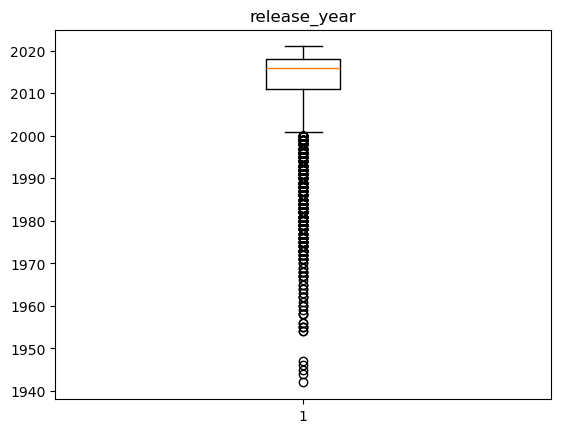

In [16]:
# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes
cols_num = ['release_year']

#create a boxplot
plt.boxplot(df['release_year'])
plt.title('release_year')
plt.show()

In [17]:
# obtener las columnas con valores numericos
cols_numericos = df._get_numeric_data().columns
cols_numericos

#obtener las columnas con valores categoricos
cols_categoricos = df.select_dtypes(include = ['object']).columns
cols_categoricos

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [18]:
# Eliminar filas con "duration"<0
print(f"Numero de filas antes de eliminar registros por 'year': {df.shape}")
df = df[df['release_year'] > 1950]
print(f"Numero de filas antes de despues registros por 'year': {df.shape}")

Numero de filas antes de eliminar registros por 'year': (5332, 12)
Numero de filas antes de despues registros por 'year': (5327, 12)


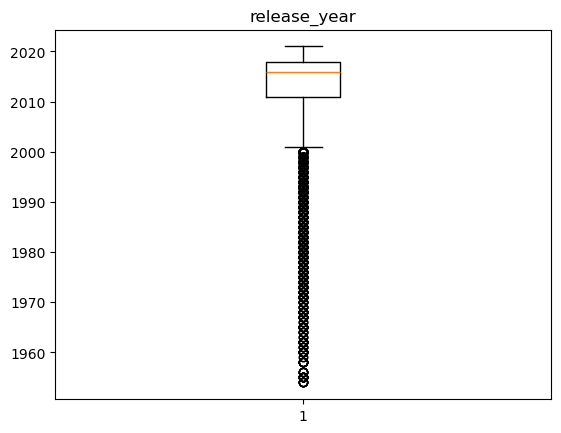

In [49]:
#create a boxplot
plt.boxplot(df['release_year'])
plt.title('release_year')
plt.show()

## 4.5 Errores tipográficos en variables categóricas


In [20]:
# Graficar los subniveles de cada variable categórica
# Conteo de los niveles en las diferentes columnas categóricas
cols_cate = ['type', 'director', 'cast', 'country', 
             'date_added','rating','duration', 'listed_in', 'description']
# Conteo de los valores diferentes por columna
for col in cols_cate:
    print(f"-------------Columna {col}: {df[col].unique()}, {df[col].nunique()} subniveles")

-------------Columna type: ['Movie' 'TV Show'], 2 subniveles
-------------Columna director: ['Haile Gerima' 'Andy Devonshire' 'Theodore Melfi' ... 'Majid Al Ansari'
 'Peter Hewitt' 'Mozez Singh'], 3940 subniveles
-------------Columna cast: ['Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra Duah, Nick Medley, Mutabaruka, Afemo Omilami, Reggie Carter, Mzuri'
 'Mel Giedroyc, Sue Perkins, Mary Berry, Paul Hollywood'
 "Melissa McCarthy, Chris O'Dowd, Kevin Kline, Timothy Olyphant, Daveed Diggs, Skyler Gisondo, Laura Harrier, Rosalind Chao, Kimberly Quinn, Loretta Devine, Ravi Kapoor"
 ...
 'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf'
 'Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers'
 'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'], 5195 subniveles
-------------Columna country: ['

In [21]:
# obtener las columnas con valores categoricos
cols_categoricos = df.select_dtypes(include = ['object']).columns
cols_categoricos


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [22]:
# Eliminación de duplicados
print("ANTES:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("DESPUÉS:", df.duplicated().sum())

ANTES: 0
DESPUÉS: 0


Columna type: ['Movie' 'TV Show'], 2 subniveles
Columna rating: ['TV-MA' 'TV-14' 'PG-13' 'PG' 'R' 'TV-PG' 'G' 'TV-Y7' 'TV-G' 'TV-Y'
 'NC-17' 'NR' 'TV-Y7-FV' 'UR'], 14 subniveles
Columna country: ['United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia'
 'United Kingdom' 'United States' 'Germany, Czech Republic' 'India'
 'United States, India, France' 'China, Canada, United States'
 'South Africa, United States, Japan' 'Japan' 'Nigeria'
 'Spain, United States' 'United Kingdom, United States'
 'United Kingdom, Australia, France'
 'United Kingdom, Australia, France, United States'
 'United States, Canada' 'Germany, United States'
 'South Africa, United States' 'United States, Mexico'
 'United States, Italy, France, Japan'
 'United States, Italy, Romania, United Kingdom'
 'Australia, United States' 'Argentina, Venezuela'
 'United States, United Kingdom, Canada' 'China, Hong Kong' 'Canada'
 'Hong Kong' 'United States, China, Hong Kong' 'Italy, United States'
 'United States, 

C:\Users\chris\AppData\Local\Temp\ipykernel_7624\3338016686.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=40, size=6)
C:\Users\chris\AppData\Local\Temp\ipykernel_7624\3338016686.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=40, size=6)
C:\Users\chris\AppData\Local\Temp\ipykernel_7624\3338016686.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=40, size=6)
C:\Users\chris\AppData\Local\Temp\ipykernel_7624\3338016686.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].se

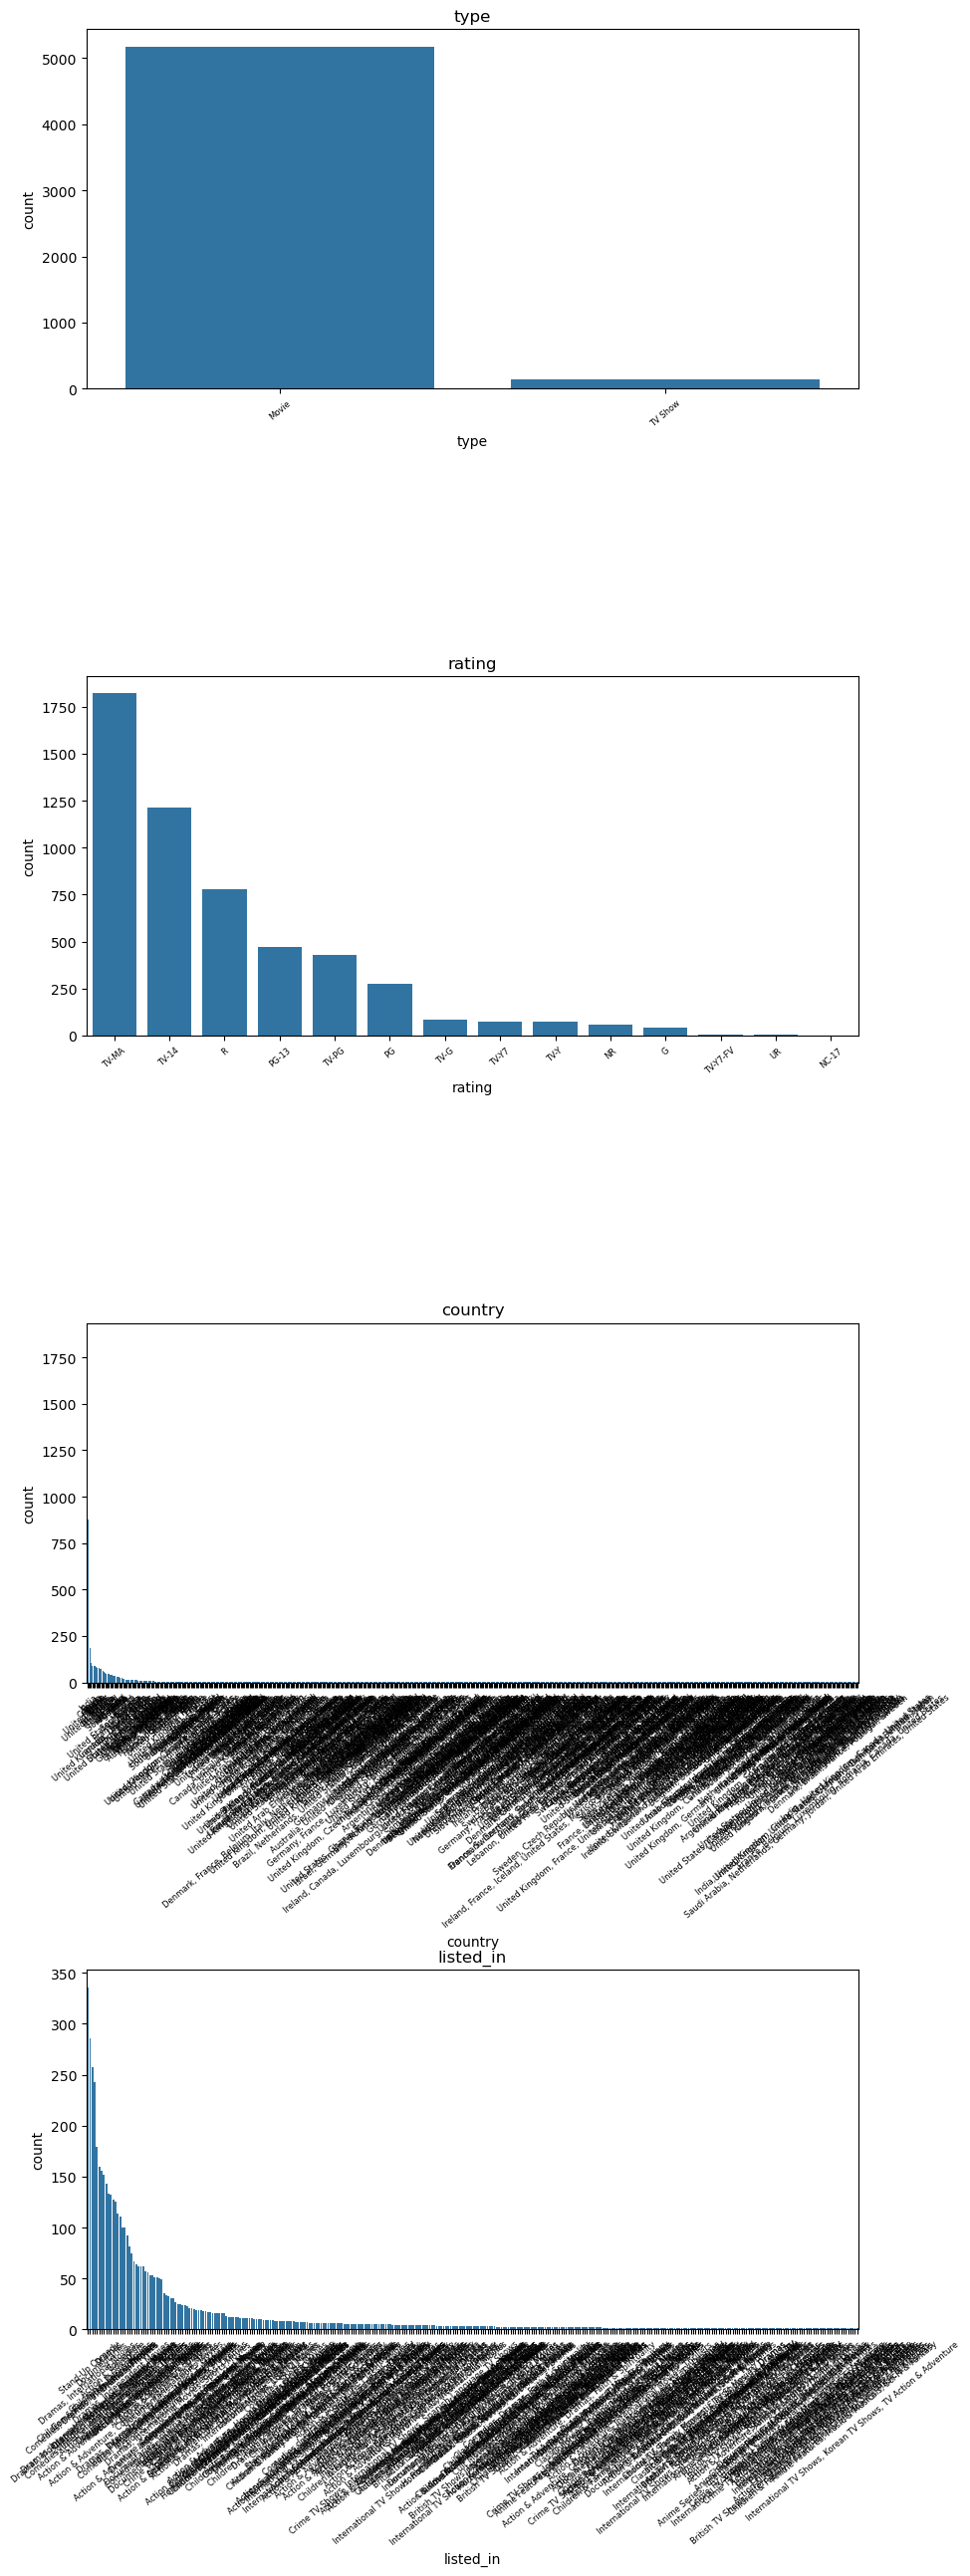

In [23]:
# Graficar las variables categóricas
cols_categoricos = ['type', 'rating', 'country', 'listed_in']

# Conteo de los valores diferentes por columna
for col in cols_categoricos:
    print(f"Columna {col}: {df[col].unique()}, {df[col].nunique()} subniveles")

# Graficar los subniveles de cada variable categórica
fig, ax = plt.subplots(nrows=len(cols_categoricos), ncols=1, figsize=(10, 30))
fig.subplots_adjust(hspace=0.8)

for i, col in enumerate(cols_categoricos):
    sns.countplot(x=col, data=df, ax=ax[i], order=df[col].value_counts().index)
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=40, size=6)

plt.show()

In [24]:
# Optimización de la columna listed_in
print("ANTES:", df['listed_in'].unique(), "Subniveles", df['listed_in'].nunique())
df['listed_in'] = df['listed_in'].str.strip()
df = df.assign(listed_in=df['listed_in'].str.split(', ')).explode('listed_in')
df['listed_in'] = df['listed_in'].replace({'TV Shows': 'TV Series', 'Sci-Fi & Fantasy': 'Science Fiction'})
category_counts = df['listed_in'].value_counts()
threshold = 20
rare_categories = category_counts[category_counts < threshold].index
df['listed_in'] = df['listed_in'].replace(rare_categories, 'Other')
print("DESPUÉS:", df['listed_in'].unique(), "Subniveles", df['listed_in'].nunique())

ANTES: ['Dramas, Independent Movies, International Movies'
 'British TV Shows, Reality TV' 'Comedies, Dramas'
 'Dramas, International Movies'
 'Comedies, International Movies, Romantic Movies' 'Comedies'
 'Horror Movies, Sci-Fi & Fantasy' 'Thrillers'
 'Action & Adventure, Dramas' 'Action & Adventure, Classic Movies, Dramas'
 'Dramas, Horror Movies, Thrillers'
 'Action & Adventure, Horror Movies, Thrillers' 'Action & Adventure'
 'Dramas, Thrillers'
 'Action & Adventure, Anime Features, International Movies'
 'Action & Adventure, Comedies, Dramas' 'Sci-Fi & Fantasy, Thrillers'
 'Children & Family Movies, Comedies' 'Documentaries, Music & Musicals'
 'Children & Family Movies, Dramas'
 'Dramas, International Movies, Thrillers' 'Dramas, Romantic Movies'
 'Comedies, Dramas, Independent Movies'
 'Dramas, International Movies, Romantic Movies' 'Dramas'
 'Action & Adventure, Classic Movies, Cult Movies'
 'Action & Adventure, Sci-Fi & Fantasy' 'Action & Adventure, Comedies'
 'Classic Movies, Com

In [25]:
# Limpieza de la columna Country
print("------------------------------------------ANTES:", df['country'].unique(), "Subniveles", df['country'].nunique())
df['country'] = df['country'].str.strip()
df['country'] = df['country'].replace({'United States': 'USA', 'United Kingdom': 'UK'})
df = df.assign(country=df['country'].str.split(', ')).explode('country')
country_counts = df['country'].value_counts()
threshold = 10
rare_countries = country_counts[country_counts < threshold].index
df['country'] = df['country'].replace(rare_countries, 'Other')
print("------------------------------------------DESPUÉS:", df['country'].unique(), "Subniveles", df['country'].nunique())

------------------------------------------ANTES: ['United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia'
 'United Kingdom' 'United States' 'Germany, Czech Republic' 'India'
 'United States, India, France' 'China, Canada, United States'
 'South Africa, United States, Japan' 'Japan' 'Nigeria'
 'Spain, United States' 'United Kingdom, United States'
 'United Kingdom, Australia, France'
 'United Kingdom, Australia, France, United States'
 'United States, Canada' 'Germany, United States'
 'South Africa, United States' 'United States, Mexico'
 'United States, Italy, France, Japan'
 'United States, Italy, Romania, United Kingdom'
 'Australia, United States' 'Argentina, Venezuela'
 'United States, United Kingdom, Canada' 'China, Hong Kong' 'Canada'
 'Hong Kong' 'United States, China, Hong Kong' 'Italy, United States'
 'United States, Germany' 'France' 'United Kingdom, Canada, United States'
 'United States, United Kingdom' 'India, Nepal'
 'New Zealand, Australia, France, United

Columna type: ['Movie' 'TV Show'], 2 subniveles
Columna rating: ['TV-MA' 'TV-14' 'PG-13' 'PG' 'R' 'TV-PG' 'G' 'TV-Y7' 'TV-G' 'TV-Y'
 'NC-17' 'NR' 'TV-Y7-FV' 'UR'], 14 subniveles
Columna country: ['United States' 'Ghana' 'Other' 'United Kingdom' 'Germany' 'UK' 'USA'
 'Czech Republic' 'India' 'France' 'China' 'Canada' 'South Africa' 'Japan'
 'Nigeria' 'Spain' 'Australia' 'Mexico' 'Italy' 'Romania' 'Argentina'
 'Hong Kong' 'New Zealand' 'Brazil' 'Greece' 'Colombia' 'Switzerland'
 'Taiwan' 'Bulgaria' 'Poland' 'Israel' 'Saudi Arabia' 'Thailand'
 'Indonesia' 'Kuwait' 'Netherlands' 'Singapore' 'Egypt' 'Malaysia'
 'South Korea' 'Vietnam' 'Belgium' 'Hungary' 'Lebanon' 'Philippines'
 'United Arab Emirates' 'Denmark' 'Sweden' 'Qatar' 'Austria' 'Turkey'
 'Russia' 'Ireland' 'Kenya' 'Chile' 'Cambodia' 'Bangladesh' 'Portugal'
 'Norway' 'Iceland' 'Serbia' 'Luxembourg' 'Uruguay' 'Peru' 'Jordan'
 'Pakistan' 'Finland' 'Iran' 'Morocco'], 69 subniveles
Columna listed_in: ['Dramas' 'Independent Movies' 'Int

C:\Users\chris\AppData\Local\Temp\ipykernel_7624\3338016686.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=40, size=6)
C:\Users\chris\AppData\Local\Temp\ipykernel_7624\3338016686.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=40, size=6)
C:\Users\chris\AppData\Local\Temp\ipykernel_7624\3338016686.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=40, size=6)
C:\Users\chris\AppData\Local\Temp\ipykernel_7624\3338016686.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].se

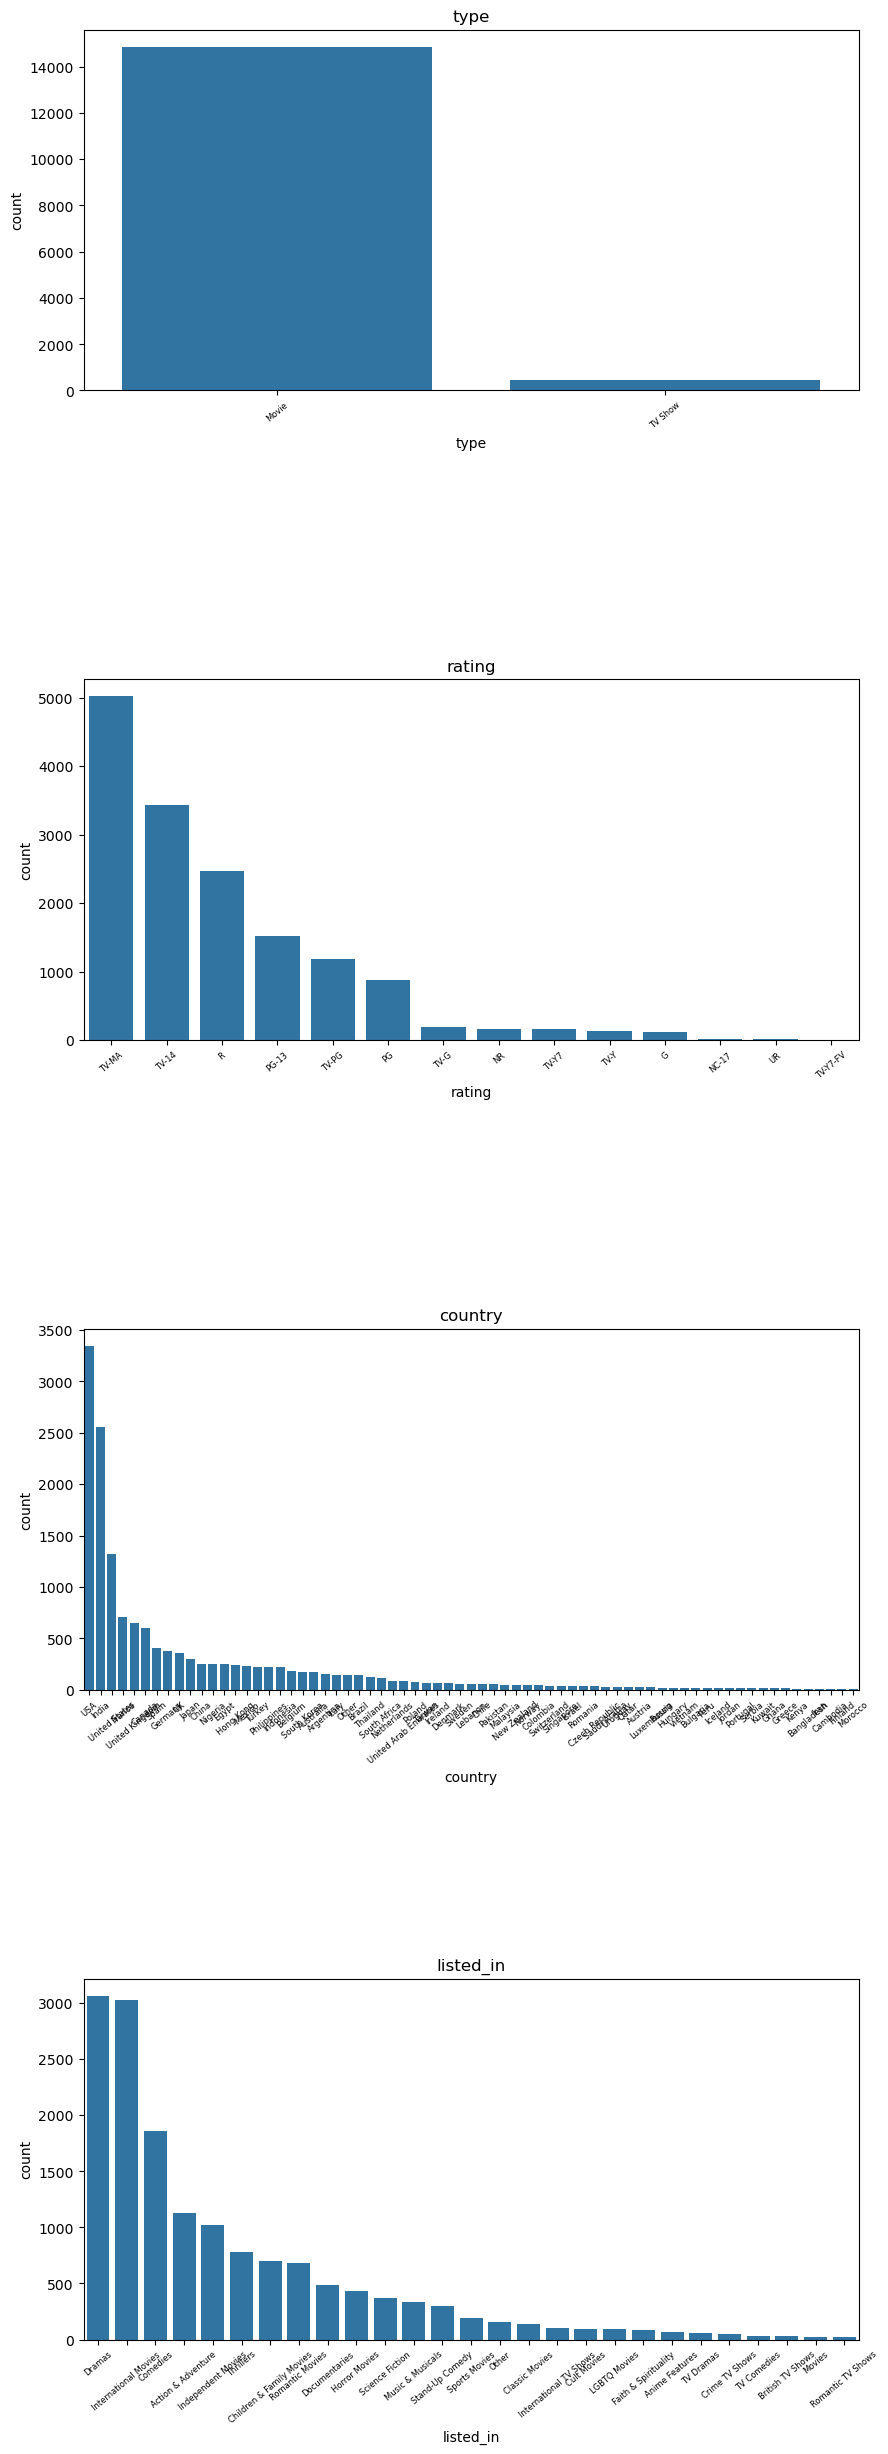

In [26]:
# Graficar las variables categóricas
cols_categoricos = ['type', 'rating', 'country', 'listed_in']

# Conteo de los valores diferentes por columna
for col in cols_categoricos:
    print(f"Columna {col}: {df[col].unique()}, {df[col].nunique()} subniveles")

# Graficar los subniveles de cada variable categórica
fig, ax = plt.subplots(nrows=len(cols_categoricos), ncols=1, figsize=(10, 30))
fig.subplots_adjust(hspace=0.8)

for i, col in enumerate(cols_categoricos):
    sns.countplot(x=col, data=df, ax=ax[i], order=df[col].value_counts().index)
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=40, size=6)

plt.show()

In [27]:
#Guardar el dataset limpio con otro nombre
df.to_csv('limpiezaDatosNetflixEscaleraChristian_clean.csv')